<h2>Посмотрим матрицу кореляции, разделим данные на тренировочную и обучающую выборки и обучим MLP(Multi Layer Perceptron)</h2>

<h3>Посмотрим матрицу кореляций</h3>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("cleaned_and_prepared_data_2.csv")

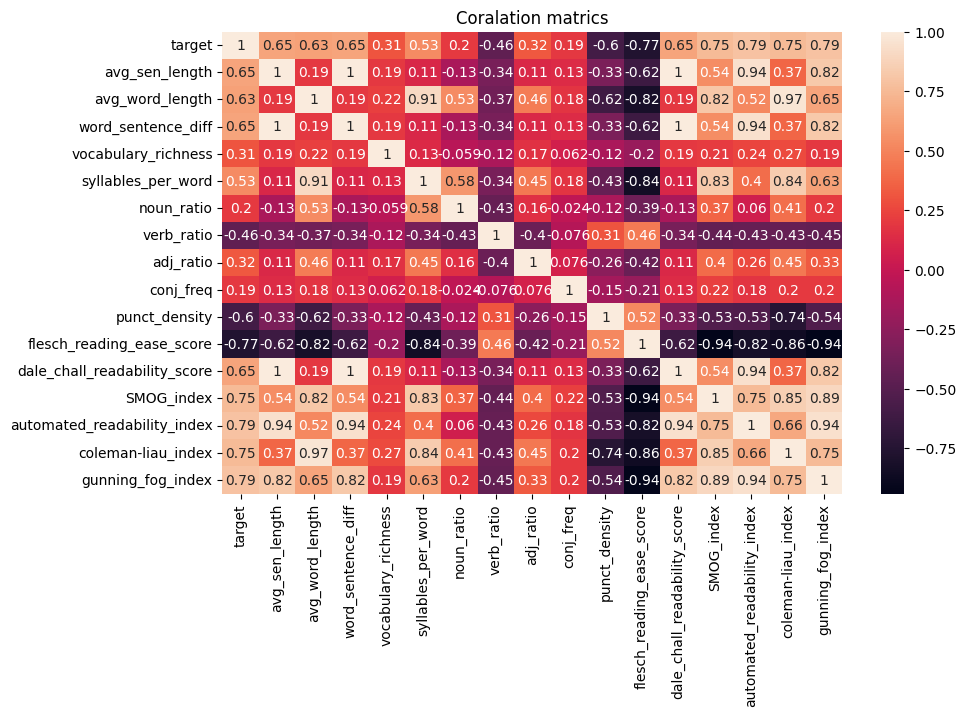

In [ ]:
df_for_corr = df[['target', 'avg_sen_length', 'avg_word_length',
       'word_sentence_diff', 'vocabulary_richness', 'syllables_per_word',
       'noun_ratio', 'verb_ratio', 'adj_ratio', 'conj_freq', 'punct_density',
       'flesch_reading_ease_score', 'dale_chall_readability_score',
       'SMOG_index', 'automated_readability_index', 'coleman-liau_index',
       'gunning_fog_index',]]
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_for_corr.corr(), ax=ax, annot=True)
plt.title("Coralation matrics")
plt.show()

<h3>Разделим данные на обучающую и тестовую выборки</h3>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['avg_sen_length', 'avg_word_length',
       'word_sentence_diff', 'vocabulary_richness', 'syllables_per_word',
       'noun_ratio', 'verb_ratio', 'adj_ratio', 'conj_freq', 'punct_density',
       'flesch_reading_ease_score', 'dale_chall_readability_score',
       'SMOG_index', 'automated_readability_index', 'coleman-liau_index',
       'gunning_fog_index',]]
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

<h2>Построим MLP нейронную сеть с двумя скрытыми слоями, активатором relu(max(0,x)</h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

<h3>Построим модель</h3>

In [ ]:
n_features = X_train.shape[1]

model = Sequential([
    Dense(256, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h3>Обучим модель. Будет 100 эпох с размером bath 32</h3>

In [ ]:


es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=32,
    verbose=1,
    callbacks=[es, rlr]
)


Epoch 1/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3858 - mae: 0.4675 - val_loss: 0.1908 - val_mae: 0.3334 - learning_rate: 0.0010
Epoch 2/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2142 - mae: 0.3578 - val_loss: 0.1902 - val_mae: 0.3388 - learning_rate: 0.0010
Epoch 3/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2264 - mae: 0.3699 - val_loss: 0.1898 - val_mae: 0.3344 - learning_rate: 0.0010
Epoch 4/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2037 - mae: 0.3518 - val_loss: 0.1983 - val_mae: 0.3422 - learning_rate: 0.0010
Epoch 5/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1975 - mae: 0.3393 - val_loss: 0.1780 - val_mae: 0.3242 - learning_rate: 0.0010
Epoch 6/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1820 - mae: 0.3305 - val_loss: 0.1866 - val_mae: 0.3337 - learning_rate: 0.0010
Epoch 7/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1808 - mae: 0.3258 - val_loss: 0.1949 - val_mae: 0.3349 - learning_rate: 0.0010
Epoch 

<h3>Выведем полученные метрики</h3>

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.8f}")
print(f"RMSE: {rmse:.8f}")
print(f"R²: {r2:.8f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 0.31455570
RMSE: 0.41387846
R²: 0.82533615


<h3>Визуализируем процесс</h3>

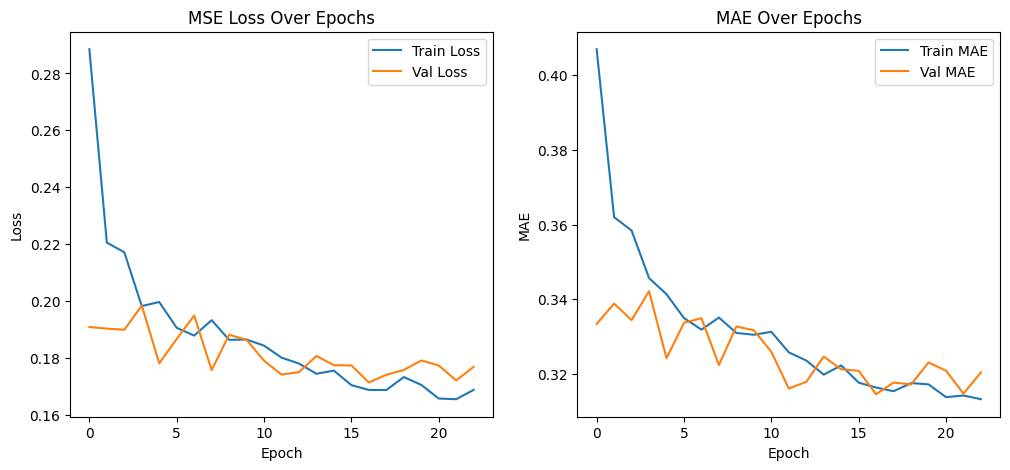

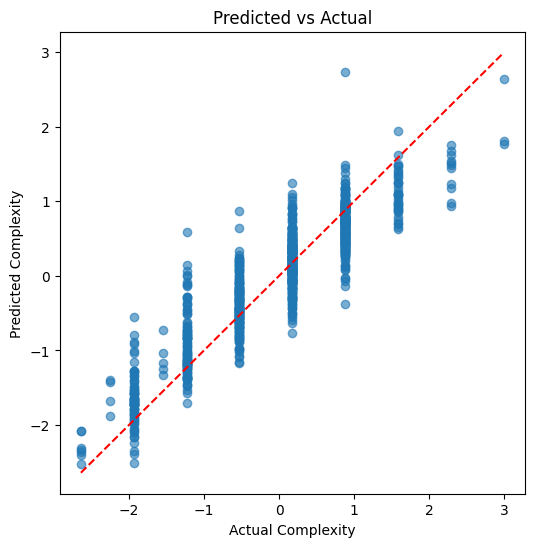

In [ ]:
# --- (a) Training curves ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('MSE Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# --- (b) Predicted vs Actual ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Complexity")
plt.ylabel("Predicted Complexity")
plt.title("Predicted vs Actual")
plt.show()


<h2>Сохраним модель</h2>

In [ ]:
import joblib

In [ ]:
model.save("text_complexity_model.keras")   # or .keras (newer format)
joblib.dump(scaler_x, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

# Load model and scalers
!Don't run code below!

In [ ]:

from tensorflow.keras.models
import load_model
import joblib
import numpy as np


model = load_model('lexile_nn_model.h5')
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

def predict_complexity(features_dict):
    # Convert dict to array
    X_new = np.array([list(features_dict.values())])

    # Scale input
    X_scaled = scaler_X.transform(X_new)

    # Predict (scaled)
    y_pred_scaled = model.predict(X_scaled)

    # Inverse scale to get real complexity
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    return float(y_pred[0][0])
